# Big markers for NK and T cells

Sample description:
- Easigenomics dataset
- Aplastic anemia
- follow up
- BM blasts = 0 %

### Reference:
R-code offered by Mustjoki group. 

Markers for NK and T cells

- t_cell=["CD3E", "TRAC", "TRBC2"]
- cd8_t=[ "GNLY", "CD8A", "CD8B", "GZMB"]
- cd4_t= ["CD4", "IL7R", "IFNG", "FOXP3"]
- inhibitory_long = ["CD28", "ICOS", "CTLA4", "PDCD1", "BTLA", "TNFRSF14", "CD27", "TNFRSF9", "TNFRSF4", "TNFRSF25", "TNFRSF9", "CD2", "CD244", "HAVCR1", "HAVCR2", "TIGIT", "CD226", "CD160", "LAG3", "LAIR1", "CD80"]
- tcell_activation = ["CD69", "CCR7","CD27", "BTLA","CD40LG","IL2RA","CD3E","CD47","EOMES","GNLY", "GZMA","GZMB", "PRF1", "IFNG","CD8A", "CD8B",  "LAMP1","LAG3","CTLA4","HLA-DRA","TNFRSF4","ICOS","TNFRSF9","TNFRSF18"]
           

- nk = ["NKG7", "FCGR3A", "PRF1","KLRG1", "KLRB1", "KLRD1", "NCAM1"]
- nk_high_markers =["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY",
                     "GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1",
                     "PLAC8", "MBP"]
- nk_genes = ["CD3E", "NCAM1", "GZMK", "SELL", "XCL1", "XCL2", "KLRC1", "IL7R", "LTB", "FCGR3A", "GZMA", "GZMB", "GZMH", "GZMM", "KLRC2", "ZEB2", "KLF2", "PRDM1", "GZMH", "LAG3"]
- nk_genes2 = ["KLRC1","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","SG15","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

- NK immature: NCAM1(CD56)
- NK activating: NCR1(CD335), KLRK1(CD314), CD2, CD226
- NK maturation: B3GAT1 (CD57), 
- NK inhibitory: KIR2DL1 (CD158A), KIR2DL3 (CD158B2), KIR3DL1 (CD158E1)

easi: CD56, CD2, 




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')


Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [3]:
#all datasets
adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [4]:
#select sample

adata=adata[adata.obs['eg_code'] == 'EG36']

In [5]:
adata1=adata[adata.obs['cell_type'] == 'NKT']

In [6]:
adata1

View of AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [7]:
adata1

View of AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [8]:
adata1.var_names

Index(['FAM41C', 'NOC2L', 'ISG15', 'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       'ACAP3', 'PUSL1', 'AURKAIP1',
       ...
       'IKBKG', 'GAB3', 'DKC1', 'MPP1', 'F8A1', 'FUNDC2', 'BRCC3', 'VBP1',
       'TMLHE', 'VAMP7'],
      dtype='object', length=8051)

## Markers

In [39]:
#Tcells
t_cell=["CD3E", "TRAC", "TRBC2"]
cd8_t=[ "GNLY", "CD8A", "CD8B", "GZMB"]
cd4_t= ["CD4", "IL7R", "IFNG", "FOXP3"]
inhibitory_long = ["CD28", "ICOS", "CTLA4", "PDCD1", "BTLA", "TNFRSF14", "CD27", "TNFRSF9", "TNFRSF4", "TNFRSF25", "TNFRSF9", "CD2", "CD244", "HAVCR1", "HAVCR2", "TIGIT", "CD226", "CD160", "LAG3", "LAIR1", "CD80"]
tcell_activation = ["CD69", "CCR7","CD27", "BTLA","CD40LG","IL2RA","CD3E","CD47","EOMES","GNLY", "GZMA","GZMB", "PRF1", "IFNG","CD8A", "CD8B",  "LAMP1","LAG3","CTLA4","HLA-DRA","TNFRSF4","ICOS","TNFRSF9","TNFRSF18"]
           
#NKcells
nk = ["NKG7", "FCGR3A", "PRF1","KLRG1", "KLRB1", "KLRD1", "NCAM1"]
nk_high_markers =["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY",
                     "GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1",
                     "PLAC8", "MBP"]
nk_genes = ["CD3E", "NCAM1", "GZMK", "SELL", "XCL1", "XCL2", "KLRC1", "IL7R", "LTB", "FCGR3A", "GZMA", "GZMB", "GZMH", "GZMM", "KLRC2", "ZEB2", "KLF2", "PRDM1", "GZMH", "LAG3"]
nk_genes2 = ["KLRC1","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","SG15","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]



In [40]:
listOfGenes= t_cell

t_cell=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        t_cell.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD3E Yes
TRAC No
TRBC2 No
['CD3E', 'TRAC', 'TRBC2']


In [41]:
listOfGenes=cd8_t

cd8_t=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        cd8_t.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

GNLY No
CD8A No
CD8B No
GZMB Yes
['GNLY', 'CD8A', 'CD8B', 'GZMB']


In [42]:
listOfGenes=nk

nk=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

NKG7 Yes
FCGR3A No
PRF1 No
KLRG1 No
KLRB1 No
KLRD1 No
NCAM1 No
['NKG7', 'FCGR3A', 'PRF1', 'KLRG1', 'KLRB1', 'KLRD1', 'NCAM1']


In [43]:
listOfGenes=cd4_t
cd4_t=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        cd4_t.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD4 No
IL7R Yes
IFNG No
FOXP3 No
['CD4', 'IL7R', 'IFNG', 'FOXP3']


In [44]:
listOfGenes=inhibitory_long
inhibitory_long=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        inhibitory_long.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD28 No
ICOS No
CTLA4 No
PDCD1 No
BTLA No
TNFRSF14 Yes
CD27 No
TNFRSF9 No
TNFRSF4 No
TNFRSF25 Yes
TNFRSF9 No
CD2 No
CD244 No
HAVCR1 No
HAVCR2 No
TIGIT No
CD226 No
CD160 No
LAG3 No
LAIR1 Yes
CD80 No
['CD28', 'ICOS', 'CTLA4', 'PDCD1', 'BTLA', 'TNFRSF14', 'CD27', 'TNFRSF9', 'TNFRSF4', 'TNFRSF25', 'TNFRSF9', 'CD2', 'CD244', 'HAVCR1', 'HAVCR2', 'TIGIT', 'CD226', 'CD160', 'LAG3', 'LAIR1', 'CD80']


In [45]:
listOfGenes=tcell_activation
tcell_activation=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        tcell_activation.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD69 No
CCR7 Yes
CD27 No
BTLA No
CD40LG Yes
IL2RA No
CD3E Yes
CD47 No
EOMES No
GNLY No
GZMA No
GZMB Yes
PRF1 No
IFNG No
CD8A No
CD8B No
LAMP1 Yes
LAG3 No
CTLA4 No
HLA-DRA Yes
TNFRSF4 No
ICOS No
TNFRSF9 No
TNFRSF18 No
['CD69', 'CCR7', 'CD27', 'BTLA', 'CD40LG', 'IL2RA', 'CD3E', 'CD47', 'EOMES', 'GNLY', 'GZMA', 'GZMB', 'PRF1', 'IFNG', 'CD8A', 'CD8B', 'LAMP1', 'LAG3', 'CTLA4', 'HLA-DRA', 'TNFRSF4', 'ICOS', 'TNFRSF9', 'TNFRSF18']


In [46]:
listOfGenes=nk_high_markers
nk_high_markers=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_high_markers.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

FGFBP2 No
FCGR3A No
S1PR5 No
KLRC1 No
KLRC2 No
KLRC3 No
KLRD1 No
GNLY No
GZMB Yes
CX3CR1 No
GPR56 No
PRF1 No
KLRB1 No
SPON2 Yes
NKG7 Yes
TTC38 No
FCRL6 No
LILRB1 No
PLAC8 Yes
MBP Yes
['FGFBP2', 'FCGR3A', 'S1PR5', 'KLRC1', 'KLRC2', 'KLRC3', 'KLRD1', 'GNLY', 'GZMB', 'CX3CR1', 'GPR56', 'PRF1', 'KLRB1', 'SPON2', 'NKG7', 'TTC38', 'FCRL6', 'LILRB1', 'PLAC8', 'MBP']


In [47]:
listOfGenes=nk_genes
nk_genes=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_genes.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD3E Yes
NCAM1 No
GZMK No
SELL Yes
XCL1 No
XCL2 No
KLRC1 No
IL7R Yes
LTB Yes
FCGR3A No
GZMA No
GZMB Yes
GZMH No
GZMM No
KLRC2 No
ZEB2 Yes
KLF2 Yes
PRDM1 Yes
GZMH No
LAG3 No
['CD3E', 'NCAM1', 'GZMK', 'SELL', 'XCL1', 'XCL2', 'KLRC1', 'IL7R', 'LTB', 'FCGR3A', 'GZMA', 'GZMB', 'GZMH', 'GZMM', 'KLRC2', 'ZEB2', 'KLF2', 'PRDM1', 'GZMH', 'LAG3']


In [48]:
listOfGenes=nk_genes2
nk_genes2=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_genes2.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

KLRC1 No
NCAM1 No
GZMK No
GZMA No
KLRB1 No
KLRC2 No
GZMH No
LAG3 No
B2M Yes
HLA-DRA Yes
SG15 No
OAS3 Yes
MX1 Yes
IRF7 Yes
MX2 Yes
IRF9 Yes
OAS1 No
OAS2 Yes
EIF2AK2 Yes
TNFRSF18 No
TNFRSF9 No
TNFRSF4 No
CRTAM No
ENTPD1 No
HAVCR2 No
TIGIT No
TNFSF10 Yes
BCL2L11 Yes
CCL3 Yes
CCL4 No
TNF No
IFNG No
CD69 No
['KLRC1', 'NCAM1', 'GZMK', 'GZMA', 'KLRB1', 'KLRC2', 'GZMH', 'LAG3', 'B2M', 'HLA-DRA', 'SG15', 'OAS3', 'MX1', 'IRF7', 'MX2', 'IRF9', 'OAS1', 'OAS2', 'EIF2AK2', 'TNFRSF18', 'TNFRSF9', 'TNFRSF4', 'CRTAM', 'ENTPD1', 'HAVCR2', 'TIGIT', 'TNFSF10', 'BCL2L11', 'CCL3', 'CCL4', 'TNF', 'IFNG', 'CD69']


## UMAPs, T cell markers

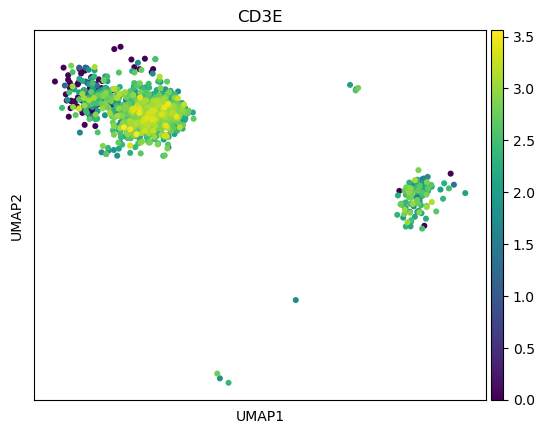

In [19]:
sc.pl.umap(adata1, color = t_cell, color_map = 'viridis', ncols = 1)

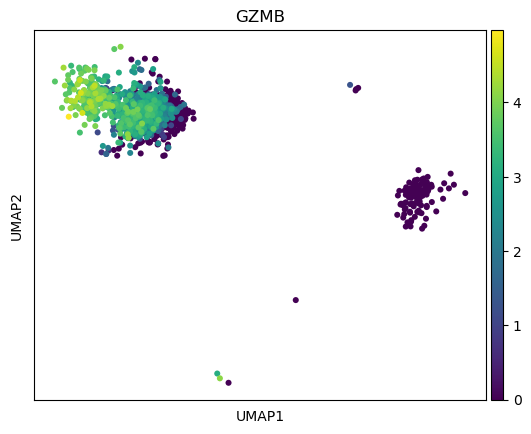

In [20]:
sc.pl.umap(adata1, color = cd8_t, color_map = 'viridis', ncols = 1)

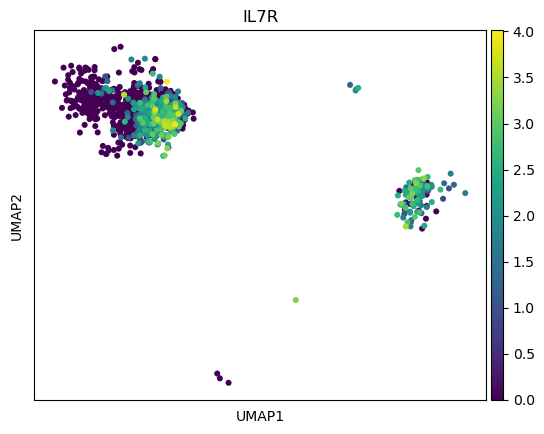

In [21]:
sc.pl.umap(adata1, color = cd4_t, color_map = 'viridis', ncols = 1)

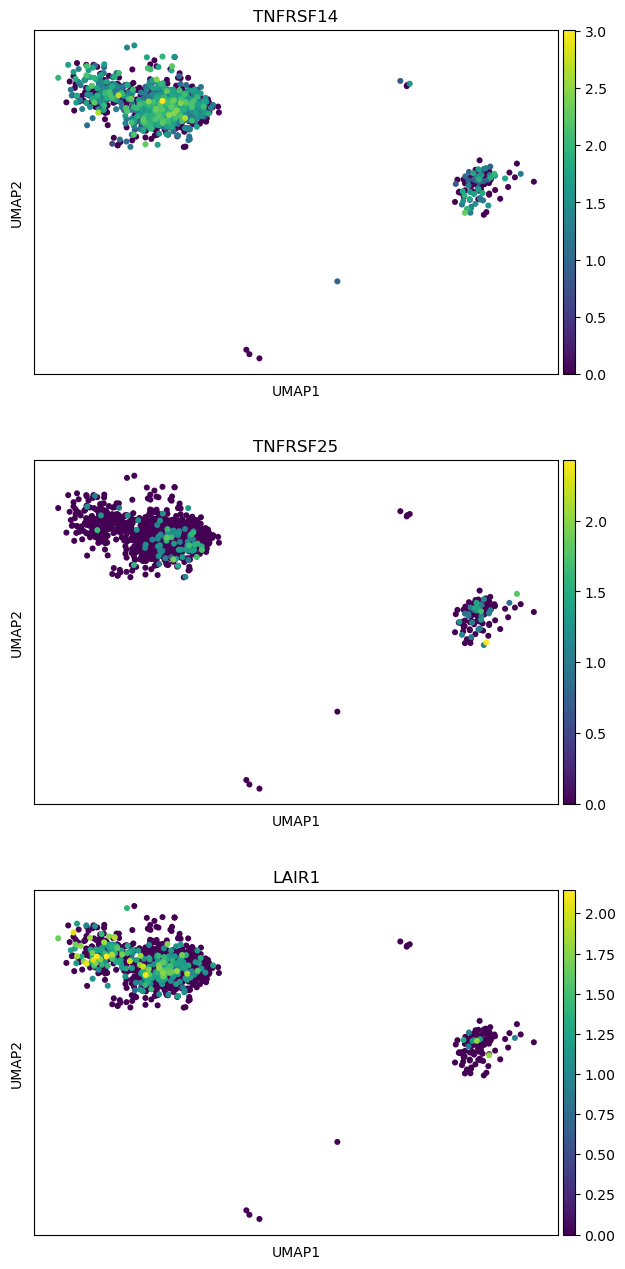

In [22]:
sc.pl.umap(adata1, color = inhibitory_long, color_map = 'viridis', ncols = 1)

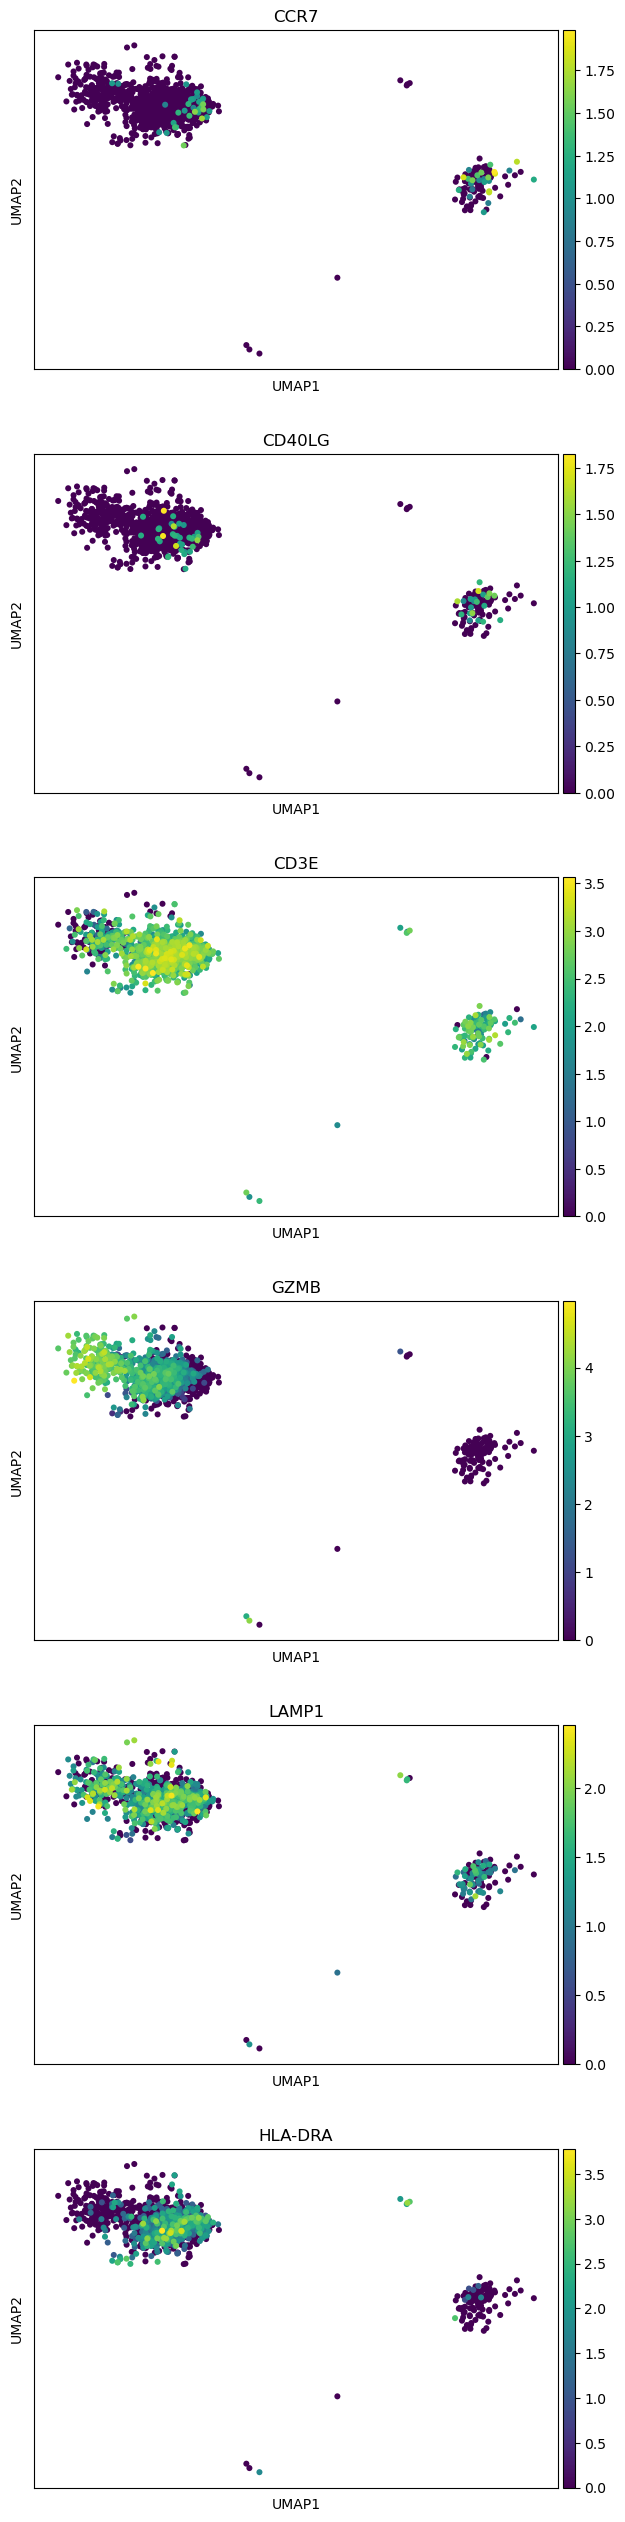

In [23]:
sc.pl.umap(adata1, color = tcell_activation, color_map = 'viridis', ncols = 1)

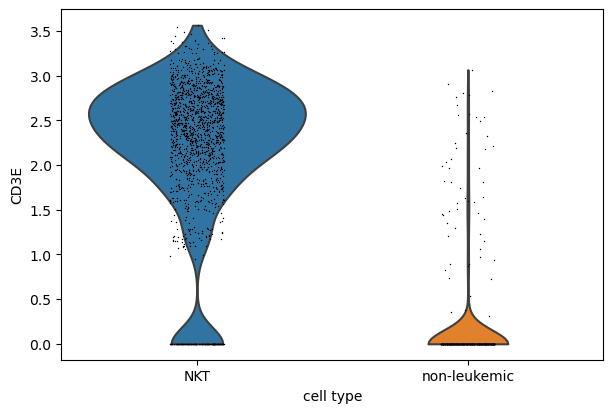

In [24]:
sc.pl.violin(adata, keys= t_cell , groupby= 'cell_type', scale = 'count')

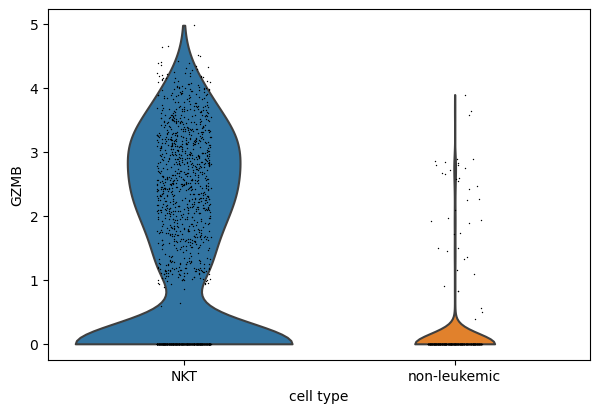

In [25]:
sc.pl.violin(adata, keys= cd8_t, groupby= 'cell_type', scale = 'count')

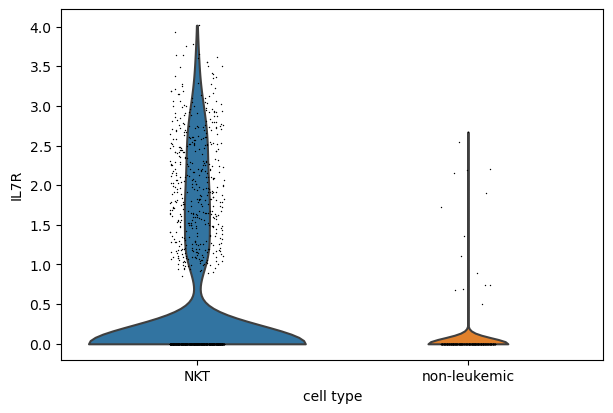

In [26]:
sc.pl.violin(adata, keys= cd4_t, groupby= 'cell_type', scale = 'count')

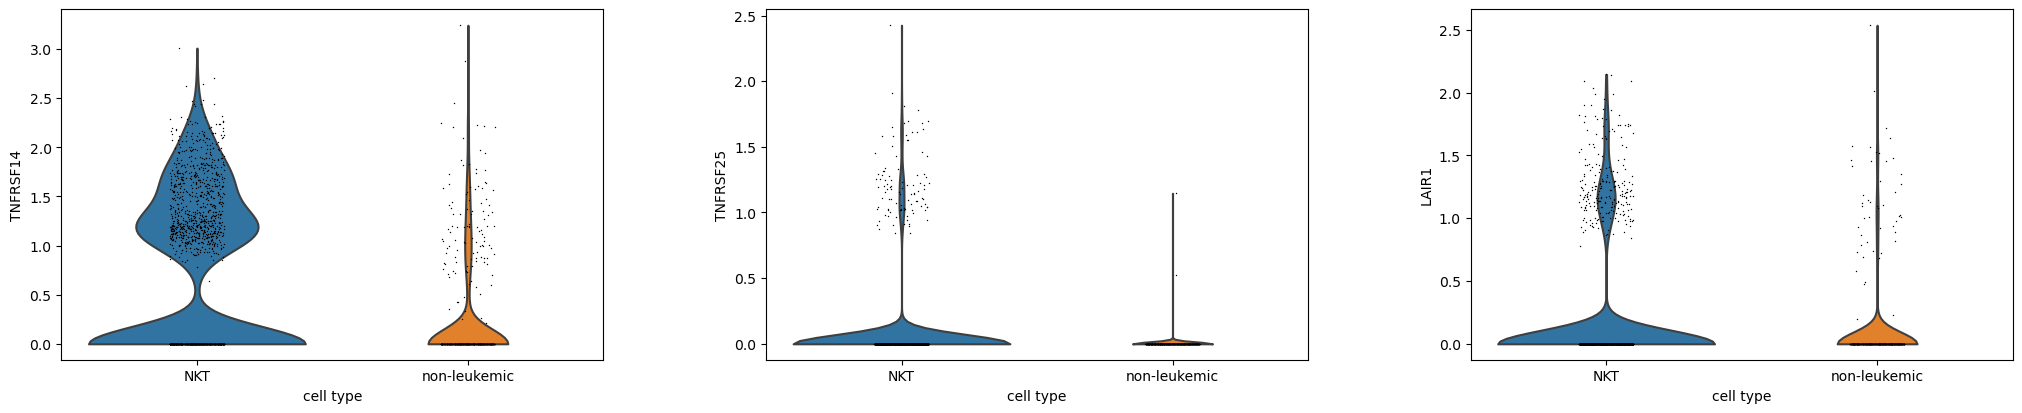

In [27]:
sc.pl.violin(adata, keys= inhibitory_long, groupby= 'cell_type', scale = 'count')

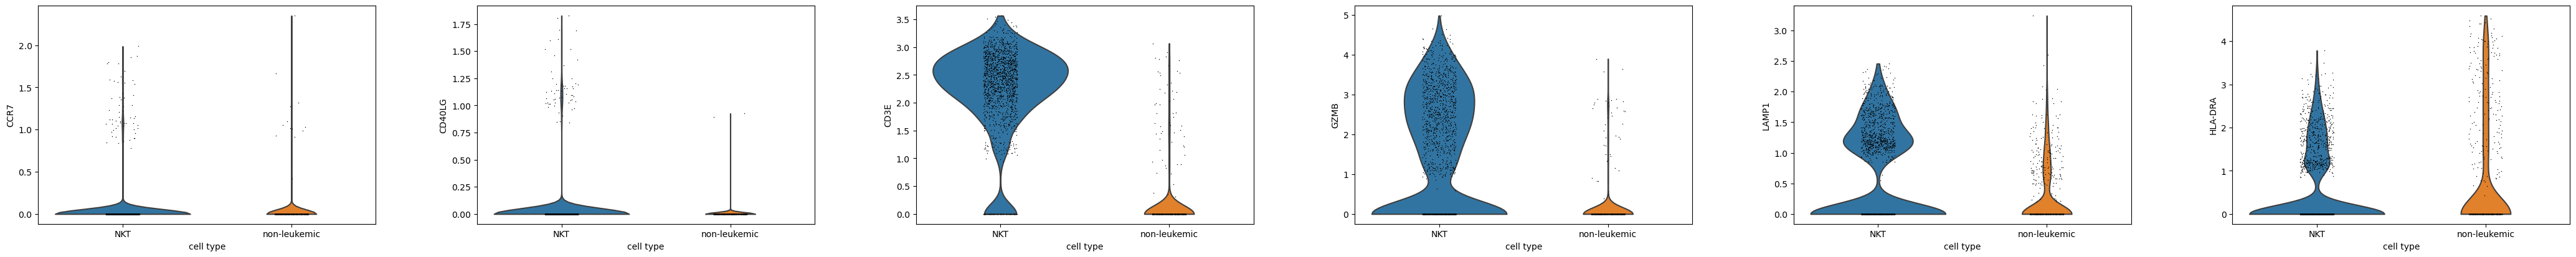

In [28]:
sc.pl.violin(adata, keys= tcell_activation, groupby= 'cell_type', scale = 'count')

## UMAPs, NK cell markers

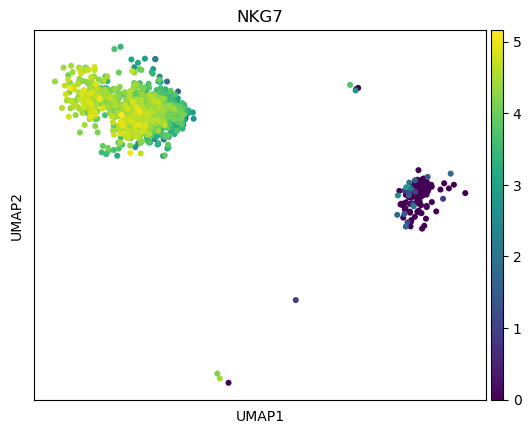

In [29]:
sc.pl.umap(adata1, color = nk, color_map = 'viridis', ncols = 1)

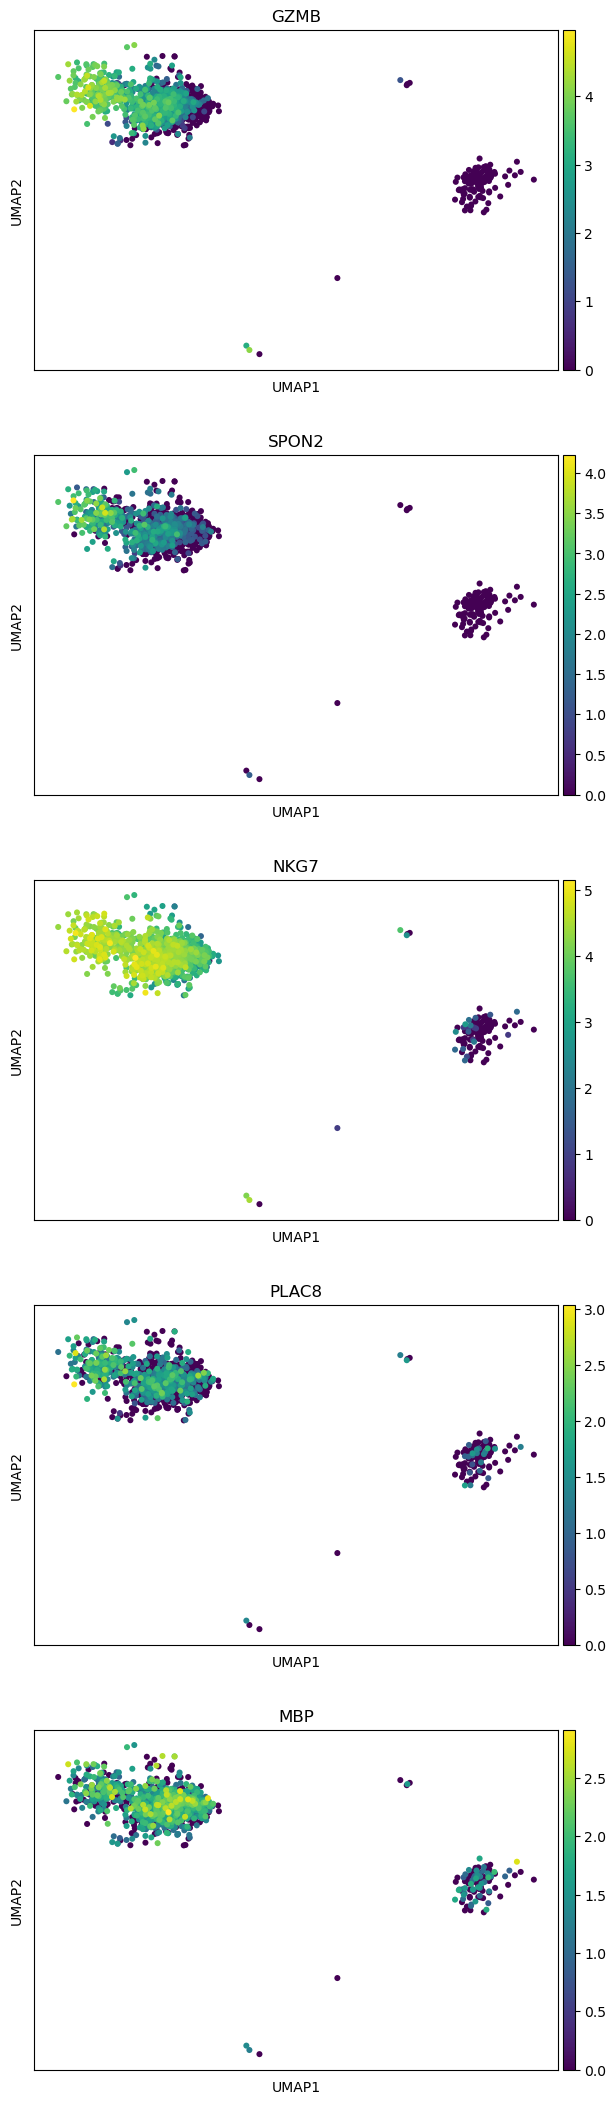

In [30]:
sc.pl.umap(adata1, color = nk_high_markers, color_map = 'viridis', ncols = 1)

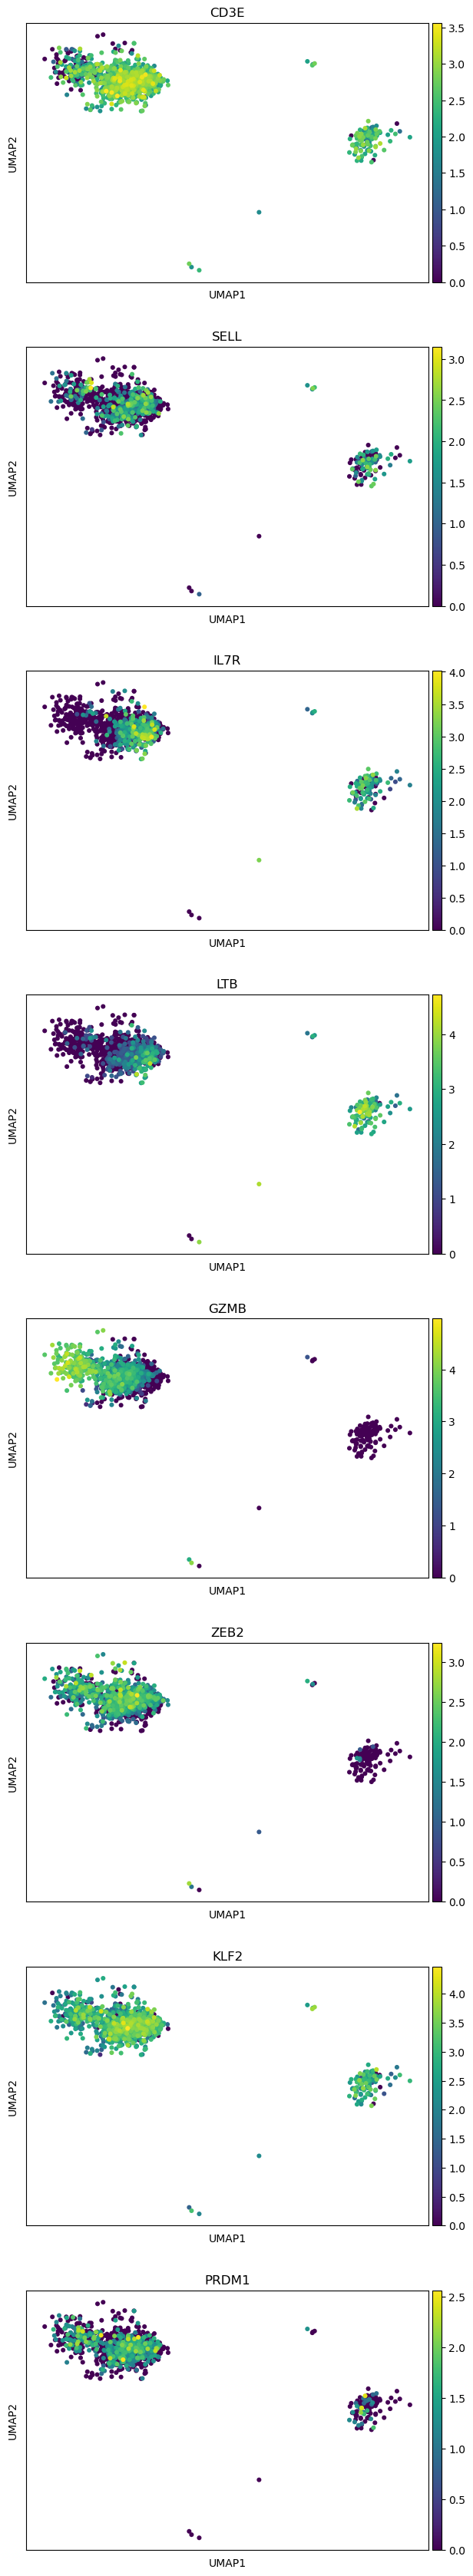

In [31]:
sc.pl.umap(adata1, color = nk_genes, color_map = 'viridis', ncols = 1)

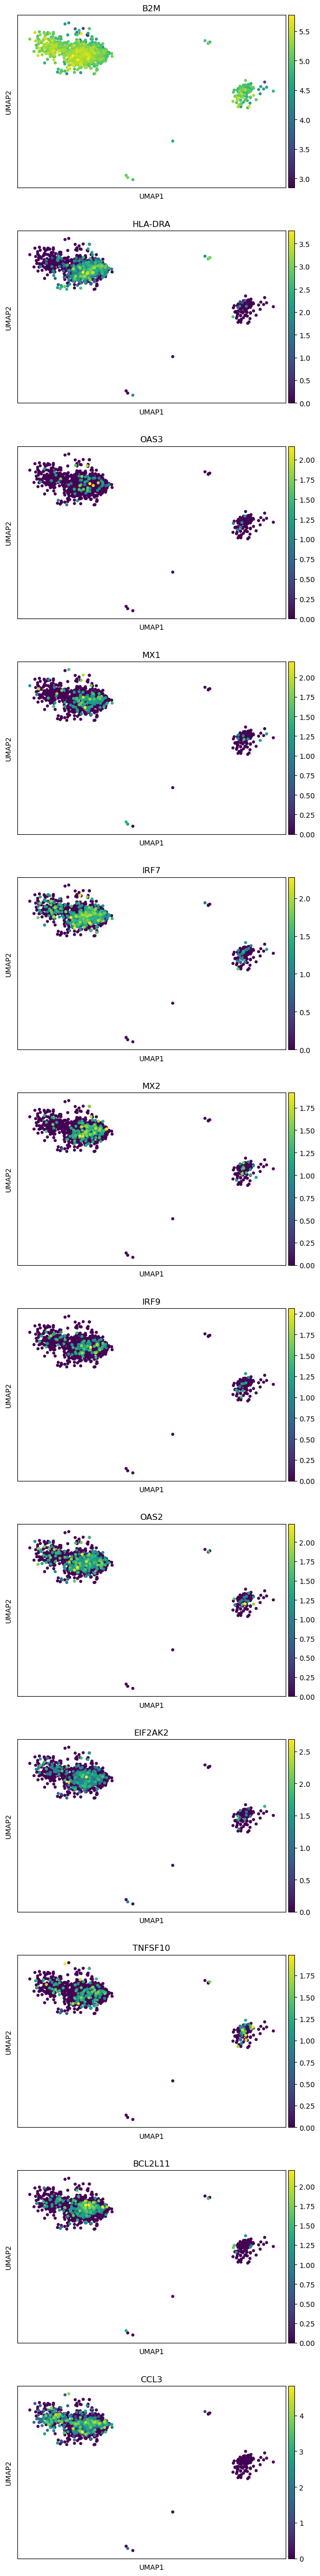

In [32]:
sc.pl.umap(adata1, color = nk_genes2, color_map = 'viridis', ncols = 1)

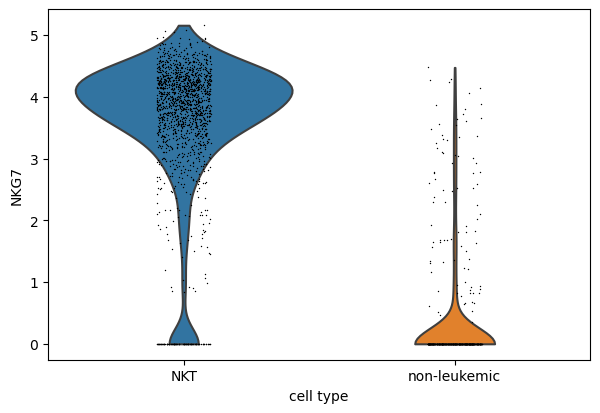

In [33]:
sc.pl.violin(adata, keys= nk, groupby= 'cell_type', scale = 'count')



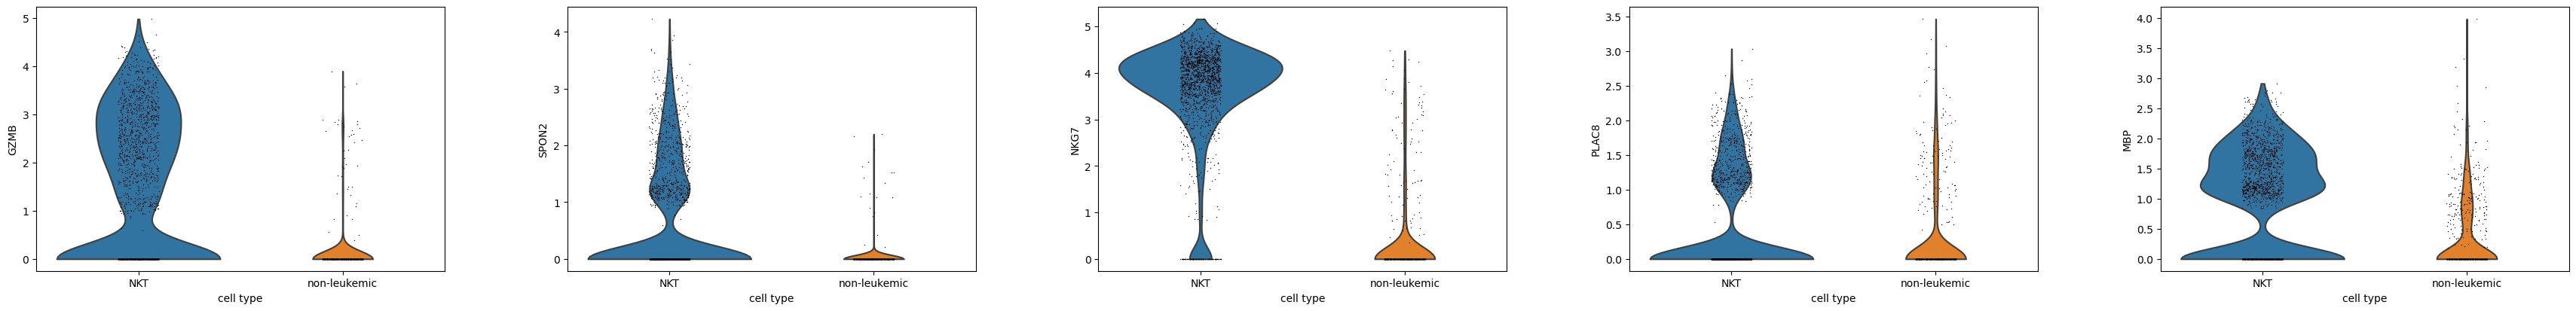

In [37]:
sc.pl.violin(adata, keys= nk_high_markers, groupby= 'cell_type', scale = 'count')



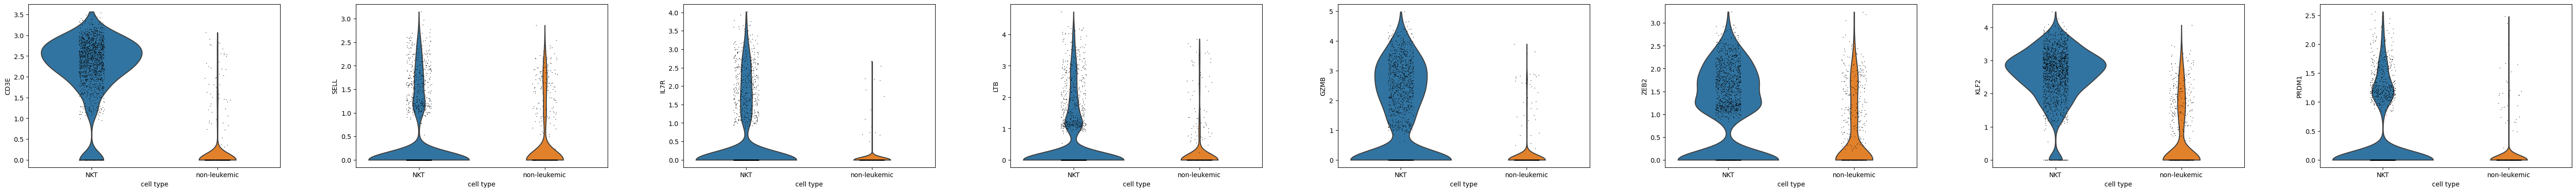

In [49]:
sc.pl.violin(adata, keys= nk_genes, groupby= 'cell_type', scale = 'count')


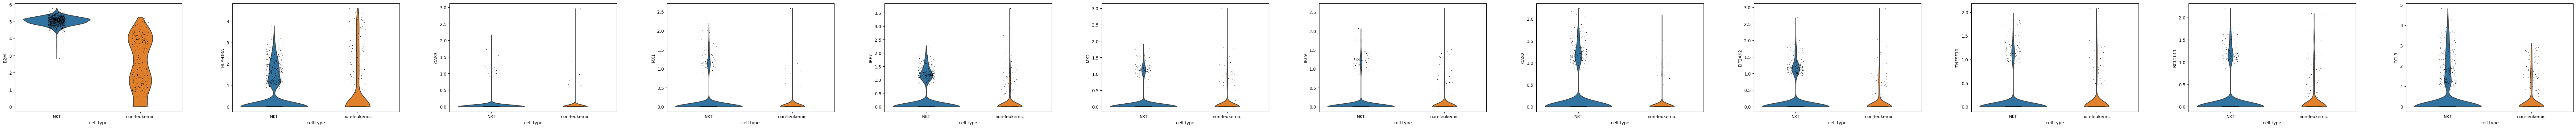

In [50]:

sc.pl.violin(adata, keys= nk_genes2, groupby= 'cell_type', scale = 'count')

